In [17]:
import os, time, librosa, librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import RMSprop, Adam

import audio_data_loader as audioloader
import audio_data_writer as audiowriter
import dataset_loader as dataset
import references as ref

### Neural network model builder

In [15]:
class GendersDefinition(Model):
    
    def __init__(self, audio_shape):
        super(GendersDefinition, self).__init__()
        
        self.layer_input = Input((audio_shape, 1))
        self.flatten = Flatten()
        self.layer_001 = Dense(400, activation = 'relu')
        self.layer_002 = Dense(320, activation = 'relu')
        self.layer_003 = Dropout(0.2)
        self.layer_004 = Dense(100, activation = 'relu')
        self.layer_output = Dense(1, activation = 'sigmoid')
        
    def call(self, inputs):
        #x = self.layer_input(inputs)
        x = self.layer_001(inputs)
        x = self.flatten(x)
        x = self.layer_002(x)
        x = self.layer_003(x)
        x = self.layer_004(x)
        
        return self.layer_output(x)

In [33]:
def get_prediction(sample_path, model):
    
    y, sr = audioloader.read_audio(sample_path)
    
    sound_sample = dataset.get_features(y, sr)
    sound_sample = np.array(sound_sample)
    
    
    
    x = np.expand_dims(sound_sample, axis = 0)
    x = np.expand_dims(x, axis = 2)    
    print(x.shape)
    
    y_pred = model.predict(x)
    value = y_pred[0][0]
    index = round(value)
    
    return 'Gender definded - {} / value = {}'.format(ref.gender_ref[index], value)

### Visualizations

In [4]:
def show_accuracy(data):
    
    fig, ax = plt.subplots(figsize = (15, 6))
    
    ax.plot(data.epoch, data.history['accuracy'], label = 'Accuracy')
    ax.plot(data.epoch, data.history['val_accuracy'], label = 'Validation Accuracy')
    
    plt.legend()
    plt.show()

### Training process

In [5]:
source = audioloader.create_source_dataset(ref.root_path)

Data source array is prepared - 0.01710057258605957 c


In [6]:
x_train, x_val, y_train, y_val = dataset.get_dataset(source)

1440it [11:57,  2.01it/s]


In [7]:
x_train = np.expand_dims(x_train, axis = 2)
x_val = np.expand_dims(x_val, axis = 2)

In [8]:
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(1296, 101, 1)
(144, 101, 1)
(1296,)
(144,)


In [18]:
model = GendersDefinition(x_train.shape[1])

In [19]:
model.compile(optimizer = Adam(learning_rate = 0.001),
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

In [20]:
history = model.fit(x_train, y_train, batch_size = 50, epochs = 50, validation_split = 0.1)

Epoch 1/50
24/24 [==============================] - 4s 124ms/step - loss: 33.7670 - accuracy: 0.5523 - val_loss: 2.5956 - val_accuracy: 0.6615
Epoch 2/50
24/24 [==============================] - 3s 112ms/step - loss: 4.1174 - accuracy: 0.6355 - val_loss: 0.5583 - val_accuracy: 0.8231
Epoch 3/50
24/24 [==============================] - 2s 91ms/step - loss: 1.5618 - accuracy: 0.7564 - val_loss: 0.5074 - val_accuracy: 0.8385
Epoch 4/50
24/24 [==============================] - 3s 112ms/step - loss: 0.9327 - accuracy: 0.7693 - val_loss: 0.2970 - val_accuracy: 0.8769
Epoch 5/50
24/24 [==============================] - 3s 114ms/step - loss: 0.4560 - accuracy: 0.8285 - val_loss: 0.2773 - val_accuracy: 0.8923
Epoch 6/50
24/24 [==============================] - 3s 110ms/step - loss: 0.2858 - accuracy: 0.8894 - val_loss: 0.2898 - val_accuracy: 0.9154
Epoch 7/50
24/24 [==============================] - 3s 110ms/step - loss: 0.3347 - accuracy: 0.8671 - val_loss: 0.2967 - val_accuracy: 0.8923
Epoch 

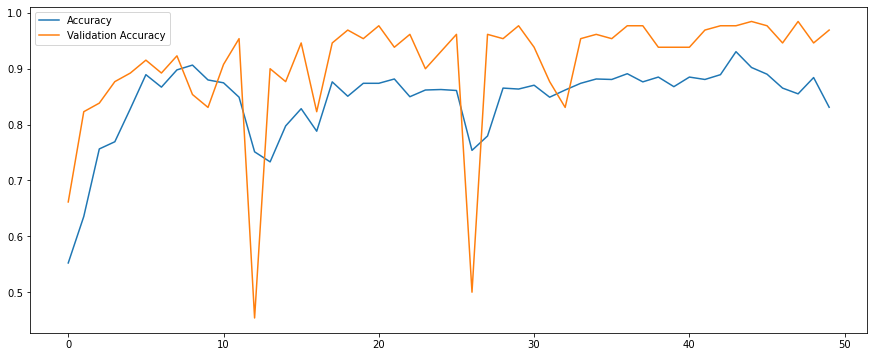

In [21]:
show_accuracy(history)

In [22]:
pred = model.evaluate(x_val, y_val)

5/5 [==============================] - 0s 19ms/step - loss: 0.0366 - accuracy: 0.9931


### Sample Audio recording

In [23]:
sample_filename = audiowriter.write_audio()

* recording
* data recording


In [34]:
result = get_prediction(sample_filename, model)
print(result)

(1, 101, 1)
Gender definded - male / value = 0.028748929500579834
